I will use the human genome as the database and the mixed reads as the input.

unaligned.fastq will contain the sequences that didn't align with the database, and therefore would be the contamination



INPUT: [5389676@ip-172-30-0-105 ~]$ bowtie2 -p 4 --very-fast --no-unal -x /data/references/hg19/hg19 \ -U /data/Lab6_data/mixed_reads1.fastq,/data/Lab6_data/mixed_reads2.fastq -S filtered.sam --un unaligned.fastq

OUTPUT: 2570882 reads; of these:
 
 2570882 (100.00%) were unpaired; of these:
   
   2060197 (80.14%) aligned 0 times
   
   468483 (18.22%) aligned exactly 1 time
   
   42202 (1.64%) aligned >1 times

19.86% overall alignment rate

Seems like 80.14% came from contaminating human DNA

Input:
[5389676@ip-172-30-0-105 ~]$ bowtie2 -p 4 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 \ -U /data/Lab6_data/mixed_reads1.fastq,/data/Lab6_data/mixed_reads2.fastq -S oneidensis.sam --un unaligned_2.fastq                            

Output:
2570882 reads; of these:

    2570882 (100.00%) were unpaired; of these:
    
    1244457 (48.41%) aligned 0 times
    
    1238875 (48.19%) aligned exactly 1 time
    
    87550 (3.41%) aligned >1 times
    
    51.59% overall alignment rate

unaligned.fastq will contain the sequences that didn't align with the database, and therefore would be the contamination

48.41% didn't reference the genome. Yet, when doing very-sensitive, the unalignment rate went down to 48.21%. Overall, pretty impressive that very-fast maintained that level of accuracy with its speed.


In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np

test = np.loadtxt('depth.tab', dtype={'names': ('first', 'second', 'third'), 'formats': ('S15', 'f8', 'f8')}, delimiter = "\t")

print(test)


[(b'AE014299.2', 1.00000e+00,  1.) (b'AE014299.2', 2.00000e+00,  3.)
 (b'AE014299.2', 3.00000e+00,  4.) ... (b'AE014300.1', 1.61611e+05, 19.)
 (b'AE014300.1', 1.61612e+05, 17.) (b'AE014300.1', 1.61613e+05, 11.)]


In [3]:
labels = [t[0] for t in test]
X = [t[1] for t in test]
Y = [t[2] for t in test]

In [8]:
%matplotlib inline


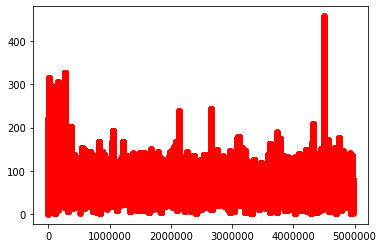

In [11]:
plt.plot(X,Y, 'ro')
plt.show()

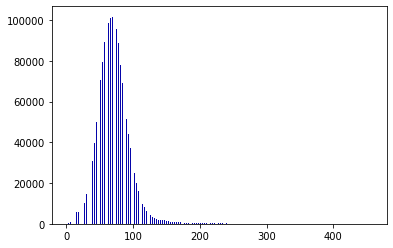

In [27]:
n, bins, patches = plt.hist(x=Y, bins='auto', color='#0504aa')



In [5]:
print(min(Y))
print(max(Y))
print(sum(Y)/len(Y))

1.0
457.0
70.44318087922572


^this is the min, max, and mean of the coverage of every position


In [7]:
len(X)

5131424